# Task 

Analyse the blowmentioned dataset and train a breast cancer prediction model on it.

Title: Wisconsin Diagnostic Breast Cancer (WDBC) - https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Prognostic%29



Data Set Information:

Each record represents follow-up data for one breast cancer case. These are consecutive patients seen by Dr. Wolberg since 1984, and include only those cases exhibiting invasive breast cancer and no evidence of distant metastases at the time of diagnosis.  The first 30 features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. A few of the images can be found at [Web Link]  The separation described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree. Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes. The actual linear program used to obtain the separating plane in the 3-dimensional space is that described in: 
[K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34]. 

Features are computed from a digitized image of a fine needle
	aspirate (FNA) of a breast mass.  They describe
	characteristics of the cell nuclei present in the image.
	A few of the images can be found at
	http://www.cs.wisc.edu/~street/images/
    
    
Attribute information

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

Several of the papers listed above contain detailed descriptions of
how these features are computed. 

The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

# Format -

1. Firstly i'm going to load the dataset and answer all the 3 questions that were asked. These answers will be drawn from the analysis that's done later. I'm reporting these answers at the top so that it's easy to find them in the notebook. 

2. Secondly is Exploratory data analysis (EDA) and feature selection, data preprocessing.

3. Model training and reporting results using different metric.

4. Dimensionality reduction using PCA. We get a very similar 

In [1]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set(style="white")

from sklearn.model_selection import train_test_split,KFold,GridSearchCV,cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_recall_curve,roc_curve, precision_score,recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
# load the dataset
data = pd.read_csv('/Users/sharadjoshi/Desktop/Self Study/wdbc.data',header=None)
print(data.shape)
data.head()

(569, 32)


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Since column names are not included in the data file but mentioned separately we';; manually create the column list
# from the given descriptions.

#   a) radius (mean of distances from center to points on the perimeter)
#	b) texture (standard deviation of gray-scale values)
#	c) perimeter
#	d) area
#	e) smoothness (local variation in radius lengths)
#	f) compactness (perimeter^2 / area - 1.0)
#	g) concavity (severity of concave portions of the contour)
#	h) concave points (number of concave portions of the contour)
#	i) symmetry 
#	j) fractal dimension ("coastline approximation" - 1)
    
id_diagn = ['id','diagnosis']
measurements = ['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness','mean_compactness',
                'mean_concavity','mean_concave_points','mean_symmetry','mean_fractal_dimension',
               'std_err_radius','std_err_texture','std_err_perimeter','std_err_area','std_err_smoothness','std_err_compactness',
                'std_err_concavity','std_err_concave_points','std_err_symmetry','std_err_fractal_dimension',
               'worst_radius','worst_texture','worst_perimeter','worst_area','worst_smoothness','worst_compactness',
                'worst_concavity','worst_concave_points','worst_symmetry','worst_fractal_dimension']



In [4]:
data.columns = id_diagn + measurements

# Questions and answers

I'm answering all the questions here first based on the analysis that i've done in this notebook. This is to make it easy to find the answers first.

1. What are the mean, median and standard deviation of the “perimeter (mean)” feature?

2. Is the first feature in this data set (“radius (mean)”) normally distributed? If not, what might be a more appropriate distribution? Please quantitatively define you answer.

3. Train a classifier to predict the diagnosis of malignant or benign. Please compare the results of two or more classifiers of your choice.

In [5]:
# 1. What are the mean, median and standard deviation of the “perimeter (mean)” feature?

print('total_mean --',data['mean_perimeter'].mean())
print('total_median -- ', data['mean_perimeter'].median())
print('total_standard deviation -- ',data['mean_perimeter'].std())

print('Benign_mean --',data.loc[data['diagnosis']=='B','mean_perimeter'].mean())
print('Benign_median -- ', data.loc[data['diagnosis']=='B','mean_perimeter'].median())
print('Benign_standard deviation -- ',data.loc[data['diagnosis']=='B','mean_perimeter'].std())

print('Malignant_mean --',data.loc[data['diagnosis']=='M','mean_perimeter'].mean())
print('Malignant_median -- ',data.loc[data['diagnosis']=='M','mean_perimeter'].median())
print('Malignant_standard deviation -- ',data.loc[data['diagnosis']=='M','mean_perimeter'].std())

# we can see that on average, higher the mean_perimeter, more the chances of malignant cancer tumor.

total_mean -- 91.96903339191564
total_median --  86.24
total_standard deviation --  24.298981038754906
Benign_mean -- 78.075406162465
Benign_median --  78.18
Benign_standard deviation --  11.80743758010874
Malignant_mean -- 115.36537735849056
Malignant_median --  114.2
Malignant_standard deviation --  21.85465329107372


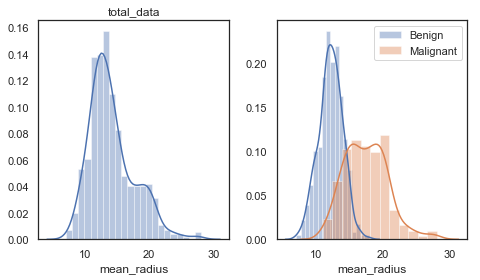

In [6]:
# 2. Is the first feature in this data set (“radius (mean)”) normally distributed? 
# If not, what might be a more appropriate distribution? Please quantitatively define you answer.
plt.figure(figsize=[10,4])
plt.subplot(1,3,1)
sns.distplot(data['mean_radius'])
plt.title('total_data')
plt.subplot(1,3,2)
sns.distplot(data.loc[data['diagnosis']=='B','mean_radius'],label='Benign')
sns.distplot(data.loc[data['diagnosis']=='M','mean_radius'],label = 'Malignant')
plt.legend()
plt.tight_layout()


# Looking at the figures below we can conlcude that the distribution of mean radius is not a guassian
# distribution but a superposition of a gaussain distribution with another approximately(because of small double peak)
# guassian distribution.

In [7]:
# 3. Train a classifier to predict the diagnosis of malignant or benign. 
# Please compare the results of two or more classifiers of your choice.

# I've performed the calculations below (on a blind test set) but mentioning the results here for quick reference.

# Linear SVM

print('SVM_Accuracy ---',  0.9824561403508771)
print('SVM_Precision ---', 0.9767441860465116)
print('SVM_Recall ---', 0.9767441860465116)
print('SVM_F1_score ---', 0.9767441860465116)

# Logistic regression
print('LR_Accuracy ---',  0.9649122807017544)
print('LR_Precision ---', 0.9333333333333333)
print('LR_Recall ---', 0.9767441860465116)
print('LR_F1_score ---', 0.9545454545454545)

# Random forest
print('RFC_Accuracy ---',  0.9473684210526315)
print('RFC_Precision ---', 0.9512195121951219)
print('RFC_Recall ---', 0.9069767441860465)
print('RFC_F1_score ---', 0.9285714285714286)

SVM_Accuracy --- 0.9824561403508771
SVM_Precision --- 0.9767441860465116
SVM_Recall --- 0.9767441860465116
SVM_F1_score --- 0.9767441860465116
LR_Accuracy --- 0.9649122807017544
LR_Precision --- 0.9333333333333333
LR_Recall --- 0.9767441860465116
LR_F1_score --- 0.9545454545454545
RFC_Accuracy --- 0.9473684210526315
RFC_Precision --- 0.9512195121951219
RFC_Recall --- 0.9069767441860465
RFC_F1_score --- 0.9285714285714286


# Train, val and blind test set

We'll create a train and blind test set here. The val set will be created on the fly while training the model.

The EDA will be done on train+val set but the blind test set will only used to report the final result
to simulate the ereal life scenario as closely as possible.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data[measurements],data['diagnosis'],test_size = 0.2 ,random_state=42)

In [9]:
X_train.shape

(455, 30)

In [10]:
X_test.shape

(114, 30)

# EDA and Data preprocessing

In [11]:
X_train.describe()
# we can see that the range of values between each feature vary a lot so we'll need to normalise the
# featuers when building a predictive model

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,14.117635,19.185033,91.882242,654.377582,0.095744,0.103619,0.088898,0.048280,0.181099,0.062757,...,16.235103,25.535692,107.103121,876.987033,0.131532,0.252742,0.274595,0.114182,0.290502,0.083868
std,3.535815,4.266005,24.322027,354.943187,0.013923,0.052470,0.079468,0.038060,0.027487,0.007210,...,4.811267,6.065108,33.374664,567.672841,0.023083,0.155014,0.209398,0.065326,0.063151,0.017848
min,7.691000,9.710000,47.920000,170.400000,0.052630,0.019380,0.000000,0.000000,0.116700,0.049960,...,8.678000,12.020000,54.490000,223.600000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.705000,16.170000,75.100000,420.300000,0.085825,0.062890,0.029320,0.020340,0.161850,0.057645,...,13.055000,21.045000,84.255000,516.450000,0.114400,0.144950,0.116550,0.063930,0.249500,0.071050
50%,13.300000,18.680000,85.980000,551.700000,0.094620,0.090970,0.061540,0.033410,0.179200,0.061480,...,14.970000,25.220000,97.670000,686.600000,0.130900,0.210100,0.226400,0.098610,0.282700,0.080060
75%,15.740000,21.585000,103.750000,767.600000,0.104550,0.131300,0.132350,0.073895,0.195800,0.066100,...,18.410000,29.690000,124.650000,1031.500000,0.146050,0.341600,0.387200,0.161100,0.317750,0.092070
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.311400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.218400,0.937900,1.252000,0.291000,0.663800,0.173000


In [12]:
X_train.info()
# There are no missing/null values in this dataset.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 68 to 102
Data columns (total 30 columns):
mean_radius                  455 non-null float64
mean_texture                 455 non-null float64
mean_perimeter               455 non-null float64
mean_area                    455 non-null float64
mean_smoothness              455 non-null float64
mean_compactness             455 non-null float64
mean_concavity               455 non-null float64
mean_concave_points          455 non-null float64
mean_symmetry                455 non-null float64
mean_fractal_dimension       455 non-null float64
std_err_radius               455 non-null float64
std_err_texture              455 non-null float64
std_err_perimeter            455 non-null float64
std_err_area                 455 non-null float64
std_err_smoothness           455 non-null float64
std_err_compactness          455 non-null float64
std_err_concavity            455 non-null float64
std_err_concave_points       455 non-null fl

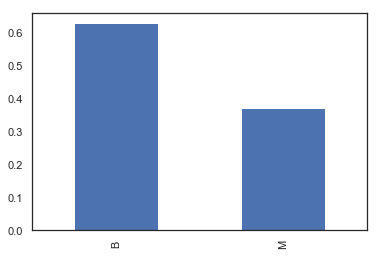

In [13]:
# How many Benign and Malignant cases are there?
(y_train.value_counts()/y_train.shape[0]).plot(kind='bar')
# It looks like a SLIGHTLY imbalanced dataset. By tracking different metrics we can see whether this affects our
# models. If yes, we can try to fix this by over/under/synthetic sampling or by modifiying the loss function
# to penalise the Malignant cases more than Benign cases.

In [14]:
# How does each feature vary for Benign vs Malignant case.
X_train[y_train=='B'].mean() - X_train[y_train=='M'].mean()

# we can see that for almost all features the mean value for Benign cases are lower than mean value for Malignant cases

mean_radius                   -5.248867
mean_texture                  -3.670664
mean_perimeter               -36.798868
mean_area                   -510.102770
mean_smoothness               -0.010798
mean_compactness              -0.064059
mean_concavity                -0.112250
mean_concave_points           -0.061224
mean_symmetry                 -0.019782
mean_fractal_dimension         0.000213
std_err_radius                -0.316181
std_err_texture                0.003613
std_err_perimeter             -2.266002
std_err_area                 -50.492541
std_err_smoothness             0.000367
std_err_compactness           -0.009785
std_err_concavity             -0.014357
std_err_concave_points        -0.004948
std_err_symmetry              -0.000080
std_err_fractal_dimension     -0.000240
worst_radius                  -7.624197
worst_texture                 -5.861493
worst_perimeter              -53.471797
worst_area                  -848.337601
worst_smoothness              -0.020536


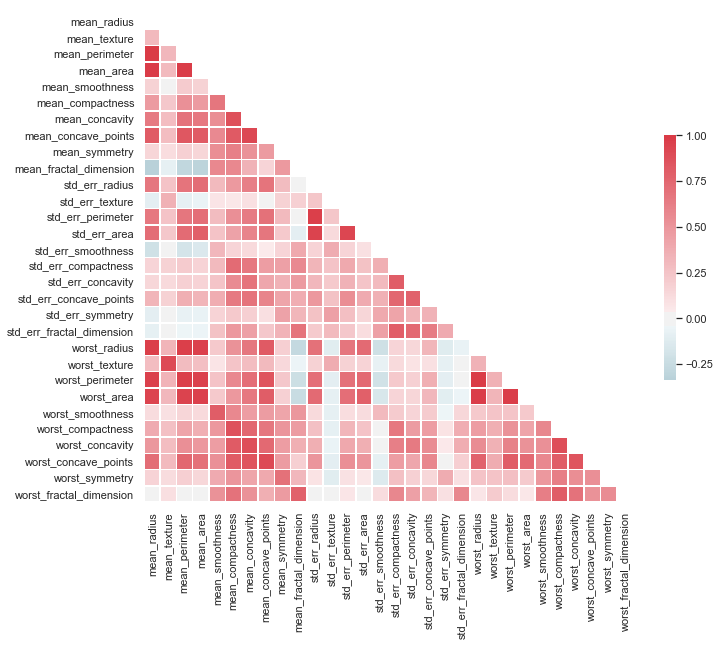

In [15]:
# plotting feature correlations
corr = X_train[measurements].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [16]:
# We can see that the features perimeter, radius,concave_points and area are highly correlated. 
# Similarly concavity and compactness are also correlated etc. We can later perform PCA to derive new dimensions from these features and drop the ones that
# doesn't explain significant variance.

In [17]:
# dropping columns with correlation > 95%
# This is important for the stability of the models that I'm goingo to train.
dropped_columns = ['mean_perimeter', 'mean_area', 'worst_radius','worst_perimeter','worst_area'
                       , "std_err_perimeter", "std_err_area"]
X_train = X_train.drop(dropped_columns, axis=1)
X_test = X_test.drop(dropped_columns, axis=1)

# updating measurements list as we've dropped some columns
for col in dropped_columns:
    measurements.remove(col)


In [18]:
# Now let's check the feature distributions. Assuming that a feature is discriminative of M or B category
# we can expect to see a superposition/mixture of standard distributions.

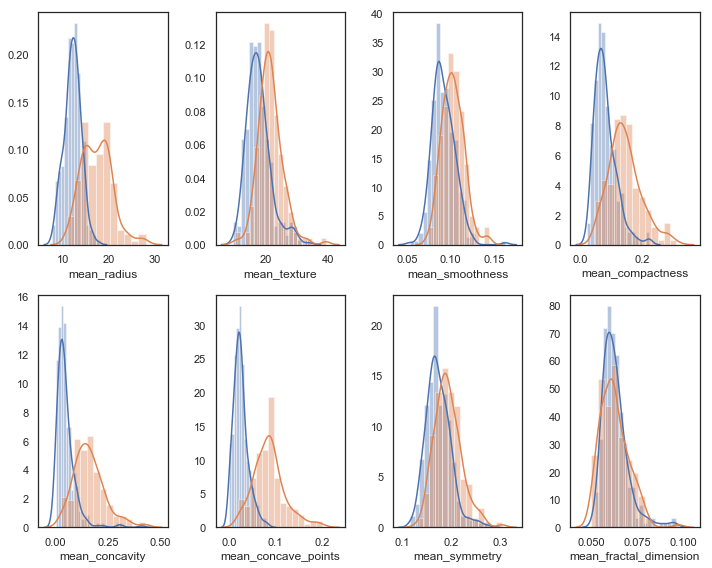

In [19]:
# Now we'll check which features are discriminative of M and B category.
f, axes = plt.subplots(2, 4,figsize=[10,8])
i=0
j=0
for feature in measurements:
    if feature.startswith('mean'):
        sns.distplot(X_train.loc[y_train=='B',feature],ax = axes[i][j%4])
        sns.distplot(X_train.loc[y_train=='M',feature],ax = axes[i][j%4])
        j+=1
        if j==4:
            i+=1
plt.tight_layout()


# we can see that smoothness,symmetry, and fractal_dimensions are not
# very discriminative between M and B. Dropping these features might improve our
# model performance as we're getting rid of noisy features. 

# On the other hand, radius, perimeter, area, concave_points, compactness,concavity are good features
# that can help our predictive model.

# texture is a borderline case(due to sharp peaks) where it might or might not be useful in combination with other features.
# We can even use PCA to select features that explain the most variance.

# We can also see that all the distributions are close to a normal distribution.

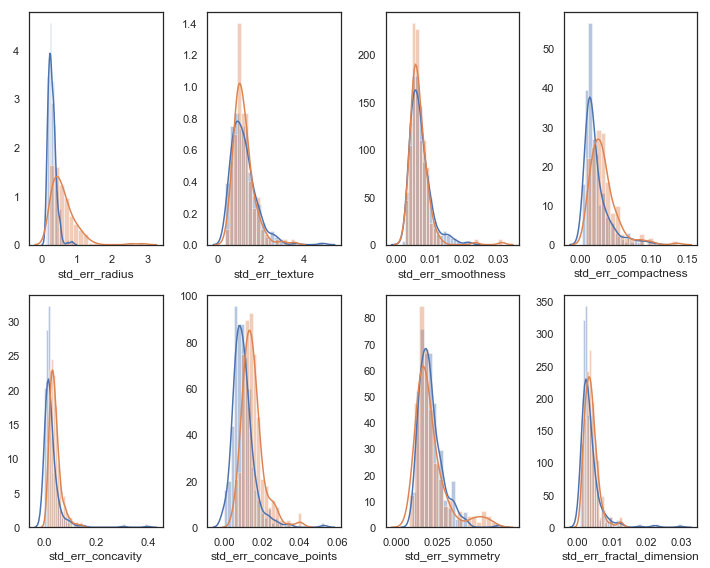

In [20]:
# Now we'll check which features are discriminative of M and B category.
f, axes = plt.subplots(2, 4,figsize=[10,8])
i=0
j=0
for feature in measurements:
    if feature.startswith('std_err'):
        sns.distplot(X_train.loc[y_train=='B',feature],ax = axes[i][j%4])
        sns.distplot(X_train.loc[y_train=='M',feature],ax = axes[i][j%4])
        j+=1
        if j==4:
            i+=1
plt.tight_layout()

# it's the same story as before but on average mean seems to be a better feature than std_err

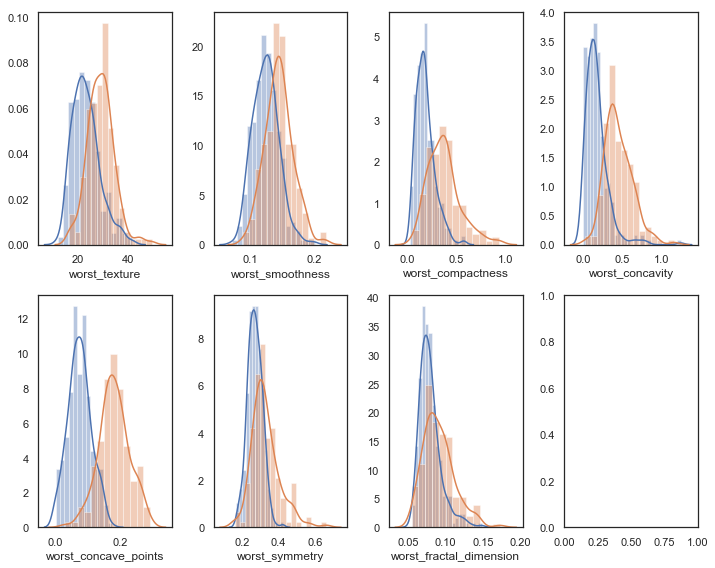

In [21]:
# Now we'll check which features are discriminative of M and B category.
f, axes = plt.subplots(2, 4,figsize=[10,8])
i=0
j=0
for feature in measurements:
    if feature.startswith('worst'):
        sns.distplot(X_train.loc[y_train=='B',feature],ax = axes[i][j%4])
        sns.distplot(X_train.loc[y_train=='M',feature],ax = axes[i][j%4])
        j+=1
        if j==4:
            i+=1
plt.tight_layout()

# same as the mean plots.

# Feature scaling

In [22]:
# Scale the features to the same range
rs = RobustScaler()
X_train = rs.fit_transform(X_train)
X_test = rs.transform(X_test)

# Model training

In [23]:
# grid search and 10-fold cross validation to choose best model and hyperparameters
svm_params = {'C':[0.001,0.01,0.1,10,20,100], 'kernel':['rbf','linear','sigmoid','poly'],'gamma':['auto'],'class_weight' : ['balanced']}
lr_params = {'C':[0.001,0.01,0.1,10,20,100],'solver' :['liblinear'],'class_weight' : ['balanced']}
rf_params = {'n_estimators':[10,100],'class_weight' : ['balanced'],'max_depth':[10,100]}

models = []
models.append(('svm',SVC(),svm_params))
models.append(('lr',LogisticRegression(),lr_params))
models.append(('rfc',RandomForestClassifier(),rf_params))


for label,model,param in models:
    model_grid = GridSearchCV(model,param,cv=10)
    model_grid.fit(X_train,y_train)
    best_parameters = model_grid.best_params_  
    print(label,best_parameters,model_grid.best_score_,model_grid.cv_results_['std_test_score'][model_grid.best_index_]) 
    

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


svm {'C': 0.1, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'linear'} 0.978021978021978 0.009942255084400874
lr {'C': 10, 'class_weight': 'balanced', 'solver': 'liblinear'} 0.9714285714285714 0.019962396972989748
rfc {'class_weight': 'balanced', 'max_depth': 100, 'n_estimators': 100} 0.9626373626373627 0.0138724517558953


In [24]:
# Based on the above results it seems SVM is the best model for this task as the accuracy is highest 
# for SVM with lowest variance. Therefore we'll train the SVM model with the abovementioned parameters.

In [25]:
# Assuming that Malignant is the positive case (i.e. postive detection of cancer)
svc = SVC(C=0.1,kernel='linear',gamma='auto',class_weight='balanced')
svc.fit(X_train,y_train);
svm_pred = svc.predict(X_test)
# Accuracy score
print('SVM_Accuracy --- ',accuracy_score(y_test,svm_pred))
# Precision score
print('SVM_Precision ---',precision_score(y_test,svm_pred,pos_label='M'))
# recall
print('SVM_Recall ---',recall_score(y_test,svm_pred,pos_label='M'))
# f1_score
print('SVM_F1_score ---' , f1_score(y_test,svm_pred,pos_label='M'))

# confusion matrix
confusion_matrix(y_test,svm_pred)

# we can also plot the precision_recall_curve or roc_curve here. 

SVM_Accuracy ---  0.9824561403508771
SVM_Precision --- 0.9767441860465116
SVM_Recall --- 0.9767441860465116
SVM_F1_score --- 0.9767441860465116


array([[70,  1],
       [ 1, 42]])

In [26]:
# Assuming that Malignant is the positive case (i.e. postive detection of cancer)
lr = LogisticRegression(C=10,class_weight='balanced',solver='liblinear')
lr.fit(X_train,y_train);
lr_pred = lr.predict(X_test)
# Accuracy score
print('LR_Accuracy --- ',accuracy_score(y_test,lr_pred))
# Precision score
print('LR_Precision ---',precision_score(y_test,lr_pred,pos_label='M'))
# recall
print('LR_Recall ---',recall_score(y_test,lr_pred,pos_label='M'))
# f1_score
print('LR_F1_score ---' , f1_score(y_test,lr_pred,pos_label='M'))

# confusion matrix
confusion_matrix(y_test,lr_pred)


LR_Accuracy ---  0.9649122807017544
LR_Precision --- 0.9333333333333333
LR_Recall --- 0.9767441860465116
LR_F1_score --- 0.9545454545454545


array([[68,  3],
       [ 1, 42]])

In [27]:
# Assuming that Malignant is the positive case (i.e. postive detection of cancer)
rfc = RandomForestClassifier(max_depth=100,n_estimators=100)
rfc.fit(X_train,y_train);
rfc_pred = rfc.predict(X_test)
# Accuracy score
print('RFC_Accuracy --- ',accuracy_score(y_test,rfc_pred))
# Precision score
print('RFC_Precision ---',precision_score(y_test,rfc_pred,pos_label='M'))
# recall
print('RFC_Recall ---',recall_score(y_test,rfc_pred,pos_label='M'))
# f1_score
print('RFC_F1_score ---' , f1_score(y_test,rfc_pred,pos_label='M'))

# confusion matrix
confusion_matrix(y_test,lr_pred)


RFC_Accuracy ---  0.9473684210526315
RFC_Precision --- 0.9743589743589743
RFC_Recall --- 0.8837209302325582
RFC_F1_score --- 0.9268292682926831


array([[68,  3],
       [ 1, 42]])

# Analysing the wrong prediction on svm

In [28]:
# Analyse the model and check the cases that are predicted wrongly
print(np.sum(svc.coef_[0]*X_test[(y_test!=svm_pred) & (y_test=='B')]) + svc.intercept_)
print(np.sum(svc.coef_[0]*X_test[(y_test!=svm_pred) & (y_test=='M')]) + svc.intercept_)

# Since we've used linear SVM, we can intepret the coefficients properly i.e dot product of the coefficient
# with the data > 0 means positive(M) class and < 0  means negative(B) class.

# We can see that in the case when the real data says "B", the dot product > 0 i.e. our model can confidently
# predict M.


# We can see that in the case when the real data says "M", the dot product < 0 i.e. our model will predict B.

# There are several reasons why this happens - 

# 1. labelling mistake in dataset.
# 2. Missing feature
# 3. Outlier

[0.18441103]
[-0.97585625]


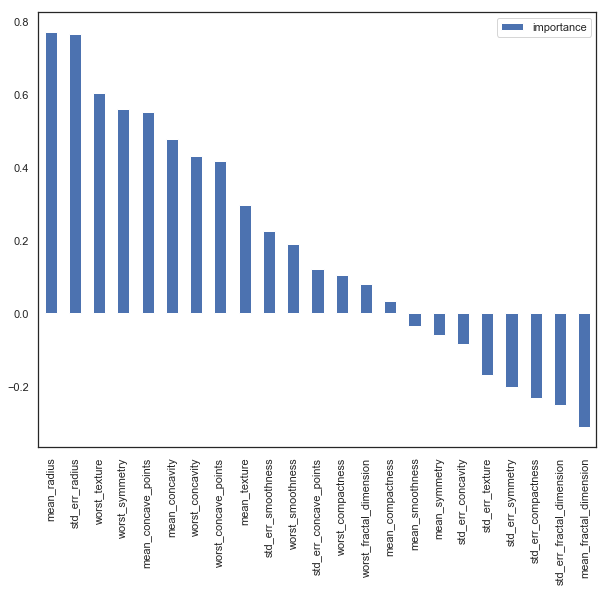

In [29]:
# feature behaviour according to linear svm's coefficient for "M" class prediction
pd.DataFrame(svc.coef_[0],measurements,columns=['importance']).sort_values('importance',ascending=False).plot(kind='bar',figsize=[10,8]);


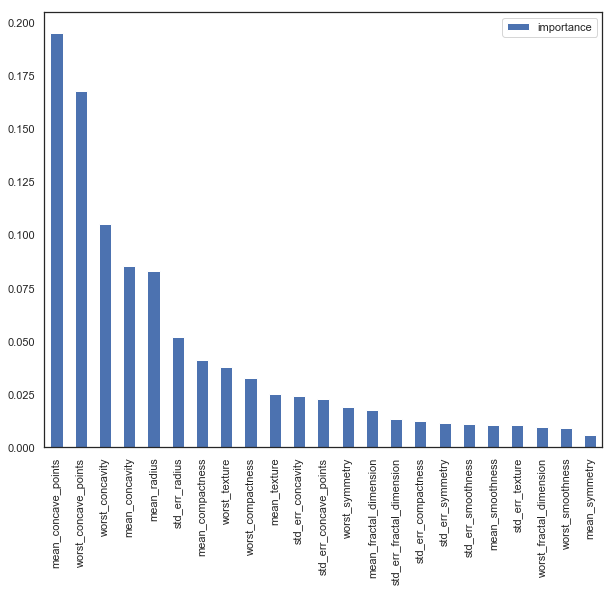

In [30]:
# We'll also train the random forest classifier and check the most important features.
rfc = RandomForestClassifier(n_estimators=100,class_weight='balanced')
rfc.fit(X_train,y_train)
confusion_matrix(y_test,rfc.predict(X_test))

# Plotting feature importance
pd.DataFrame(rfc.feature_importances_,measurements,columns=['importance']).sort_values('importance',ascending=False).plot(kind='bar',figsize=[10,8]);


# PCA - Dimensionality reduction

Dimensionality reduction as well as useful feature selection using Principal Component Analysis

In [31]:
from sklearn.decomposition import PCA

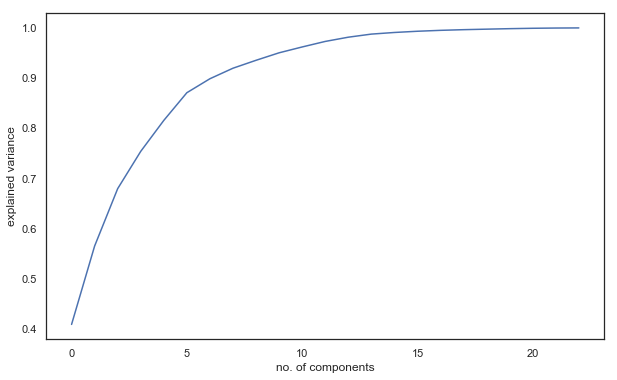

In [32]:
# Applying PCA for dimensionality reduction and feature independence
pca = PCA()
pca.fit(X_train)
plt.figure(figsize=[10,6])
plt.plot(range(len(pca.explained_variance_ratio_)),pca.explained_variance_ratio_.cumsum())  
plt.xlabel('no. of components')
plt.ylabel('explained variance');

# Top 17 features explain the 99% of the variance in the data.

In [33]:
pca = PCA(n_components = 10)
pca.fit(X_train)
pca_X_train = pca.transform(X_train)
pca_X_test = pca.transform(X_test)

In [34]:
# grid search and 10-fold cross validation to choose best model and hyperparameters
svm_params = {'C':[0.001,0.01,0.1,10,20,100], 'kernel':['rbf','linear','sigmoid','poly'],'gamma':['auto'],'class_weight' : ['balanced']}
lr_params = {'C':[0.001,0.01,0.1,10,20,100],'solver' :['liblinear'],'class_weight' : ['balanced']}
rf_params = {'n_estimators':[10,100],'class_weight' : ['balanced'],'max_depth':[10,100]}


models = []
models.append(('svm',SVC(),svm_params))
models.append(('lr',LogisticRegression(),lr_params))
models.append(('rfc',RandomForestClassifier(),rf_params))


for label,model,param in models:
    model_grid = GridSearchCV(model,param,cv=10)
    model_grid.fit(pca_X_train,y_train)
    best_parameters = model_grid.best_params_  
    print(label,best_parameters,model_grid.best_score_,model_grid.cv_results_['std_test_score'][model_grid.best_index_]) 

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


svm {'C': 0.1, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'linear'} 0.9736263736263736 0.009161996323514604
lr {'C': 0.1, 'class_weight': 'balanced', 'solver': 'liblinear'} 0.967032967032967 0.017952632565672845
rfc {'class_weight': 'balanced', 'max_depth': 100, 'n_estimators': 100} 0.9648351648351648 0.0314527607514691


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [35]:
# We can see that even with less than half the dimensions as before our performance is almost same as before.

In [36]:
svc = SVC(C=0.1,kernel='linear',gamma='auto',class_weight='balanced')
svc.fit(pca_X_train,y_train);

# Accuracy score
print('Accuracy --- ',accuracy_score(y_test,svc.predict(pca_X_test)))
# Precision score
print('Precision ---',precision_score(y_test,svc.predict(pca_X_test),pos_label='M'))
# recall
print('Recall ---',recall_score(y_test,svc.predict(pca_X_test),pos_label='M'))
# f1_score
print('F1_score ---' , f1_score(y_test,svc.predict(pca_X_test),pos_label='M'))

# confusion matrix
confusion_matrix(y_test,svc.predict(pca_X_test))


Accuracy ---  0.9736842105263158
Precision --- 0.9545454545454546
Recall --- 0.9767441860465116
F1_score --- 0.9655172413793104


array([[69,  2],
       [ 1, 42]])

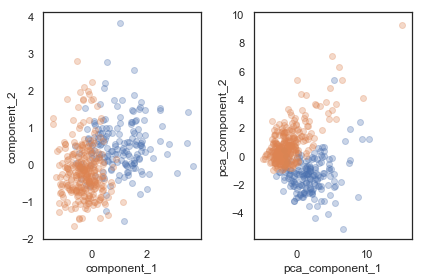

In [37]:
# Plot of first two features in our dataset vs first two components in PCA
# we can see that in case of PCA we can get a better accuracy by using a linear boundary
# even with only two features.
plt.subplot(1,2,1)
plt.scatter(X_train[y_train=='M',0],X_train[y_train=='M',1],alpha=0.3)
plt.scatter(X_train[y_train=='B',0],X_train[y_train=='B',1],alpha=0.3)
plt.xlabel('component_1')
plt.ylabel('component_2')

plt.subplot(1,2,2)
plt.scatter(pca_X_train[y_train=='M',0],pca_X_train[y_train=='M',1],alpha=0.3)
plt.scatter(pca_X_train[y_train=='B',0],pca_X_train[y_train=='B',1],alpha=0.3)
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')

plt.tight_layout()

# Further Analysis

1. Customise the loss function to penalise the False negative (real M but predicted B) cases compared to 
 False postiive cases becasue false negatives can be life threatening in real setting while false postives
are just an annoyance relaively speaking. 

2. Deep dive into the cases that we predict wrong. This will help me understand what went wrong with the 
 model and how (if possible) we can fix this problem.
 
3. Add Fuzziness in the system to direct difficult cases to human expert so that we avoid life-threstening situations.
 
4. Visualise both categories using t-sne plots.

5. Deep dive into dimensionality reduction to choose just the optimal number of dimensions to save computaitonal power.

6. Compare the performance of neural networks, gradient boosting and knn on this data.

7. Try probabilistic graphical models.

8. Compare the model peformance by removing the correlated features and adding one feature(most important) at a time.

9. Effect of data size on the model performance.